In [1]:
import numpy as np
import pandas as pd
# For visualizations
import matplotlib.pyplot as plt
# For regular expressions
import re
# For handling string
import string
# For performing mathematical operations
import math

import swifter
import spacy
import ssl
from spacy import displacy
import pandas as pd
from spacy.lang.en import English
from spacy.pipeline import EntityRuler
from sklearn.metrics import accuracy_score
from spacy.matcher import Matcher
from spacy.pipeline import EntityRuler

from fuzzywuzzy import fuzz
from fuzzywuzzy import process
from fuzzywuzzy import process, fuzz

from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

import nltk
from nltk.util import ngrams
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
stop=set(stopwords.words('english'))
#nltk.download('stopwords')

from sklearn.linear_model import LogisticRegression

from joblib import Parallel, delayed

from tqdm import tqdm
tqdm.pandas()

import matplotlib.pyplot as plt

import seaborn as sns

import re

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing

from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split

global cls_acc
cls_acc = 0
global cls_time
cls_time = 0
import time
import io

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from IPython.display import display
from IPython.display import display

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

import seaborn as sns
from sklearn.metrics import confusion_matrix
from collections import Counter
from sklearn.model_selection import learning_curve

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#df = pd.read_csv('C:/Users/Olimpio.Dasilva/Desktop/random_sampling/reporting_ncr_all_transactions_202303081406.csv')
df2 = pd.read_excel('C:/Users/Olimpio.Dasilva/Documents/GitHub/merchant_tagging/hive_metastore.smartlink_sz_db.afs_merchant_category_mapping_preview_2023_03_27 (1) (1).xlsx')
df = pd.read_excel('C:/Users/Olimpio.Dasilva/Documents/GitHub/merchant_tagging/hive_metastore.smartlink_sz_db.afs_merchant_category_mapping_preview_2023_03_27.xlsx')
pd.set_option('display.max_colwidth', None)
df = df.sample(10000)   #Known Merchants
df2 = df2.sample(10000) #Unknown merchants
#df.head(5)

In [3]:
#df2

# Mix (Known and Unknown Merchants)

In [4]:
# Concatenating transaction descriptions columns
df["TRANSACTION_DETAILS"] = df['txn_desc1'].astype(str) +" %%%%% "+ df['txn_desc2'].astype(str)

In [5]:
df["LEN_WORDS"] = df["TRANSACTION_DETAILS"].apply(lambda x: len(str(x).split()))

In [6]:
df["LEN_WORDS"].describe()

count    10000.000000
mean        11.720700
std          4.172054
min          4.000000
25%          9.000000
50%         11.000000
75%         14.000000
max         36.000000
Name: LEN_WORDS, dtype: float64

In [7]:
df["LEN_TOKENS"] = df["TRANSACTION_DETAILS"].apply(lambda x: len(str(x)) / 4)

In [8]:
df["LEN_TOKENS"].describe()

count    10000.00000
mean        17.97505
std          5.52298
min          5.25000
25%         14.00000
50%         17.00000
75%         21.00000
max         52.00000
Name: LEN_TOKENS, dtype: float64

In [9]:
print('Total number of rows and columns:', df.shape)

Total number of rows and columns: (10000, 20)


In [10]:
df.head()

,fi_id,account_id,transaction_id,amount,currency,txn_desc1,txn_desc2,region,transaction_timestamp,merchant_id,merchant_name,payment_agent,payment_agent_id,extract_date,filename,name,category,TRANSACTION_DETAILS,LEN_WORDS,LEN_TOKENS
56022,DI1425,Ab5dd6137d29032b796401b3bc26f406d,Te76aae4701823cd29daa05254fd9880a,43.74,USD,Withdrawal Debit PUBLIX 2556,ENTERPRISE RD ORANGE CITY FLUS,NaN,2023-02-14,12258,PUBLIX SUPER MARKETS,Unknow Payment Agent,NaN,2023-02-20,FTS_CSLK_TRANSAC_20230219_100012.csv,Fairwinds Credit Union,Food & Drink,Withdrawal Debit PUBLIX 2556 %%%%% ENTERPRISE RD ORANGE CITY FLUS,10,16.25
33734,DI1671,A26929e5b909531b9b7105fb9f1c61196,T519d1aefb25237e7adae7d076b662456,11.37,USD,Purchase BIG LOTS STORES 5121,SWTOPEKA KSUS,NaN,2022-07-01,10334,BIG LOTS,Unknow Payment Agent,NaN,2022-07-04,FTS_CSLK_TRANSAC_20220703_100011.csv,Envista CU,Department Stores,Purchase BIG LOTS STORES 5121 %%%%% SWTOPEKA KSUS,8,12.25
31253,DI3468,A8ea7b49d0892387994795ae082d26607,T0a7cea1aa2db365eb3936cf3ea240473,11.74,USD,DEBIT CARD DEBIT,09-12-2022 TARGET 00011 FLORISSANT MO auth #*,NaN,2022-09-13,12734,TARGET,Unknow Payment Agent,NaN,2022-09-15,FTS_CSLK_TRANSAC_20220914_100006.csv,Neighbors Credit Union,Department Stores,DEBIT CARD DEBIT %%%%% 09-12-2022 TARGET 00011 FLORISSANT MO auth #*,11,17.00
28466,DI3658,A1083a577e1833fffa3fa80edf6dffa57,Tb7bb97dbcbe6301abc3f75ceedf50311,10.84,USD,Point Of Sale Withdrawal,GOOGLE *YouTube Memg.co/helppay# CAUS,NaN,2023-01-27,11258,GOOGLE,GOOGLE,11258,2023-01-30,FTS_CSLK_TRANSAC_20230129_100012.csv,COLUMBIA CREDIT UNION,NaN,Point Of Sale Withdrawal %%%%% GOOGLE *YouTube Memg.co/helppay# CAUS,9,17.00
8732,DI8025,Af14ab26425f0343db0fe675c4a93ffd8,T89ffcc07004d32c493ea83a8f402a08e,28.12,USD,Withdrawal Visa Debit Card,CVS/PHARMACY #01456 UPPER MARLBOR MD Date 03/07/23 0 *4232 1 5912 %% Card 15 #9825,NaN,2023-03-08,10778,CVS HEALTH,Unknow Payment Agent,NaN,2023-03-11,FTS_CSLK_TRANSAC_20230310_100007.csv,STATE DEPARTMENT FEDERAL CREDIT UNION,Health & Beauty,Withdrawal Visa Debit Card %%%%% CVS/PHARMACY #01456 UPPER MARLBOR MD Date 03/07/23 0 *4232 1 5912 %% Card 15 #9825,20,28.75


In [11]:
print('Total number of rows and columns:', df2.shape)

Total number of rows and columns: (10000, 17)


In [12]:
df2.head()

,fi_id,account_id,transaction_id,amount,currency,txn_desc1,txn_desc2,region,transaction_timestamp,merchant_id,merchant_name,payment_agent,payment_agent_id,extract_date,filename,name,category
75526,DI3935,A3f8aa2ca29833597b5c9f04740f09629,Tab70de3e34183e669998dffd08d9854b,30.00,USD,Withdrawal VISA CHECK CARD,CASH APP*MERF *4551 CA Date 09/16/22 ***87960 4829 %% Card 15 #2459,NaN,2022-09-17,NaN,Unknow Merchant,SQUARE CASH APP,14024,2022-09-19,FTS_CSLK_TRANSAC_20220918_100011.csv,SkyPoint Federal Credit Union,NaN
42395,DI3892,A4344747f58fa389e81db479a4dc3b3ab,Tf85cd848d28e300a811adf9fd41514de,25.63,USD,External Withdrawal CAPITAL ONE,- MOBILE PMT,MT,2022-08-08,NaN,Unknow Merchant,Unknow Payment Agent,NaN,2022-08-11,FTS_CSLK_TRANSAC_20220810_100033.csv,Ridgewood Savings Bank,NaN
58852,DI8100,A8eb4d9a28fbe3b4797ca34becd2871c4,T84ed572a08a4320694dc08193558b37c,11.16,USD,Withdrawal Consumer Debit,CKE*SHORESIDE C 530 SHIRLEY ST WINTHROP MA Date 10/05/22 2 *570 1 5812 %% Card 15 #*2202,NaN,2022-10-06,NaN,Unknow Merchant,Unknow Payment Agent,NaN,2022-10-09,FTS_CSLK_TRANSAC_20221008_100033.csv,Webster First Federal Credit Union,NaN
36000,DI3301,Af4228999ebe232508d4b811f86758d09,T11b0c605915f3a6ea1a4e7e75d972d69,1.39,USD,Withdrawal Signature,Temu.com 138-*3 DE Date 01/05/23 ***79760 5311 %% Card 15 #8804,NaN,2023-01-05,NaN,Unknow Merchant,Unknow Payment Agent,NaN,2023-01-08,FTS_CSLK_TRANSAC_20230107_100006.csv,Arsenal Credit Union,NaN
66422,DI4428,A027570f0147936c7a4672765866721d5,T0fb684f23cbf317e8d9130cd9fb988c0,35.86,USD,BILLPAY DOMINION ENERGY,ID*0160,NaN,2023-02-21,NaN,Unknow Merchant,Unknow Payment Agent,NaN,2023-02-23,FTS_CSLK_TRANSAC_20230222_100007.csv,IDB Global FCU,NaN


# Unknown Merchant Names
- Selecting dataset with known menchants only for Entity Ruler
- Selecting dataset with unknown merchants only for Entity recognition
- Checking the number of rows and columns
- Concatenate transaction descriptions columns

In [13]:
df_known_merchs = df[['transaction_id','txn_desc1','txn_desc2','payment_agent','merchant_name','category']].copy(deep=True) 

In [14]:
df_unknown_merchs2 = df2[['transaction_id','txn_desc1','txn_desc2','payment_agent','merchant_name','category']].copy(deep=True)

In [15]:
# Concatenating transaction descriptions columns
df_unknown_merchs2["TRANSACTION_DETAILS"] = df_unknown_merchs2['txn_desc1'].astype(str) +" %%%%% "+ df_unknown_merchs2['txn_desc2'].astype(str)

In [16]:
df_unknown_merchs2["LEN_WORDS"] = df_unknown_merchs2["TRANSACTION_DETAILS"].apply(lambda x: len(str(x).split()))

In [17]:
df_unknown_merchs2["LEN_WORDS"].describe()

count    10000.00000
mean        11.30640
std          4.69062
min          3.00000
25%          8.00000
50%         10.00000
75%         14.00000
max         29.00000
Name: LEN_WORDS, dtype: float64

In [18]:
df_unknown_merchs2["LEN_TOKENS"] = df_unknown_merchs2["TRANSACTION_DETAILS"].apply(lambda x: len(str(x)) / 4)

In [19]:
df_unknown_merchs2["LEN_TOKENS"].describe()

count    10000.000000
mean        17.117425
std          6.407127
min          3.750000
25%         12.500000
50%         15.750000
75%         21.250000
max         41.000000
Name: LEN_TOKENS, dtype: float64

In [20]:
#Copy of the afs merchant names column
df_unknown_merchs2['AFS_MECHANT_NAMES'] = df_unknown_merchs2['merchant_name']
# Droping original cols
df_unknown_merchs2 = df_unknown_merchs2.drop(['txn_desc1', 'txn_desc2','payment_agent','merchant_name'], axis=1)

In [21]:
df_unknown_merchs2

,transaction_id,category,TRANSACTION_DETAILS,LEN_WORDS,LEN_TOKENS,AFS_MECHANT_NAMES
75526,Tab70de3e34183e669998dffd08d9854b,NaN,Withdrawal VISA CHECK CARD %%%%% CASH APP*MERF *4551 CA Date 09/16/22 ***87960 4829 %% Card 15 #2459,17,25.00,Unknow Merchant
42395,Tf85cd848d28e300a811adf9fd41514de,NaN,External Withdrawal CAPITAL ONE %%%%% - MOBILE PMT,8,12.50,Unknow Merchant
58852,T84ed572a08a4320694dc08193558b37c,NaN,Withdrawal Consumer Debit %%%%% CKE*SHORESIDE C 530 SHIRLEY ST WINTHROP MA Date 10/05/22 2 *570 1 5812 %% Card 15 #*2202,21,30.00,Unknow Merchant
36000,T11b0c605915f3a6ea1a4e7e75d972d69,NaN,Withdrawal Signature %%%%% Temu.com 138-*3 DE Date 01/05/23 ***79760 5311 %% Card 15 #8804,14,22.50,Unknow Merchant
66422,T0fb684f23cbf317e8d9130cd9fb988c0,NaN,BILLPAY DOMINION ENERGY %%%%% ID*0160,5,9.25,Unknow Merchant
...,...,...,...,...,...,...
41766,T977978237cf33b8487e60887af383f82,NaN,Point Of Sale Withdrawal RICK S %%%%% 718 BAR & GRI EVANSVILLE IN U,14,16.75,Unknow Merchant
70881,Td0bd9c7857e53d1eab62ef0e024f2fd4,NaN,Withdrawal FLAGSTAR %%%%% TYPE: LOAN PYMT ID: *4984 CO: FLAGSTAR NAME: RENITA JACKSON %% ACH ECC WEB %% ACH Trace **223,21,29.75,Unknow Merchant
61794,T211f31c411683870854d051255b0b987,NaN,Overdraft Prvlg %%%%% nan,4,6.25,Unknow Merchant
44618,T220a1408b75735b6b812233b6d1df5d2,NaN,AC-Earnin -PAYMENTRET %%%%% nan,4,7.75,Unknow Merchant


- Removed “WITHDRAWAL” ,“ATM” and “TRANSFER” rows
- Data cleaning

In [22]:
#df_unknown_merchs2 = df_unknown_merchs2[.str.contains("Withdrawal") == False]
# filter rows without the words 
df_unknown_merchs2 = df_unknown_merchs2[~(df_unknown_merchs2["TRANSACTION_DETAILS"].str.contains('with', case=False) | df_unknown_merchs2['TRANSACTION_DETAILS'].str.contains('transf', case=False) | df_unknown_merchs2['TRANSACTION_DETAILS'].str.contains('ATM'))]

In [23]:
df_unknown_merchs2

,transaction_id,category,TRANSACTION_DETAILS,LEN_WORDS,LEN_TOKENS,AFS_MECHANT_NAMES
66422,T0fb684f23cbf317e8d9130cd9fb988c0,NaN,BILLPAY DOMINION ENERGY %%%%% ID*0160,5,9.25,Unknow Merchant
95035,Tc384f0696d723ff7a54c470142075a67,NaN,POS Debit - DDA %%%%% IBT DEB 0908 09/24/22 *34CASH APP*OMARI*ADD*4551CACard# 0347,12,20.50,Unknow Merchant
81892,Te897fb7fe4793fc4af8be94fa4aeed01,NaN,CASH APP*NIYA %%%%% 877-417-4551 FLUS : POS Transaction,8,13.75,Unknow Merchant
61519,T0ab3a52e0203347d918eb701ce0af209,NaN,DEBIT CARD DEBIT %%%%% auth #* 03-08-2023 SP AFF GETOND SAN FRANCISCO CA,13,18.00,Unknow Merchant
76041,T1eb67dc75be43db0bcd70672ca4eb879,NaN,POS Transaction %%%%% PATRONICITY.COM THE HTTPSPATRONIC MIUS,7,15.00,Unknow Merchant
...,...,...,...,...,...,...
44234,T3a185de1efd73ee89d7de4406f93364c,NaN,DBT PURCHASE ON 01/20 @ 18:02 %%%%% CANTEEN VENDING TACOMA WA CARD NBR: -2115,14,19.25,Unknow Merchant
94061,T8b70afa11eb73a4c82108bcde3c6fe0c,NaN,DDA PUR SQ *BUTTON %%%%% SQ *BUTTONED DOWN B gosq.com IN *,12,14.50,Unknow Merchant
9536,Tb9db4dd320a8366f8725d8d744d3e78b,NaN,DEBIT CARD DEBIT %%%%% 02-11-2023 2ENTERPRISE CONC SAINT LOUIS MO auth #*,12,18.25,Unknow Merchant
61794,T211f31c411683870854d051255b0b987,NaN,Overdraft Prvlg %%%%% nan,4,6.25,Unknow Merchant


In [24]:
df_unknown_merchs2.shape

(3654, 6)

In [25]:
df_unknown_merchs2 = df_unknown_merchs2[df_unknown_merchs2["TRANSACTION_DETAILS"].str.contains("WITHDRAWAL") == False]

In [26]:
df_unknown_merchs2.shape

(3654, 6)

- Known Merchants
- Concatenate transaction descriptions columns

In [27]:
#df_unknown_merchs = df[['transaction_id','txn_desc1','txn_desc2','payment_agent','merchant_name','category']].copy(deep=True)
#df_unknown_merchs = df_unknown_merchs[df["merchant_name"].str.contains("Unknow Merchant") == True]
print('Total number of rows and columns:', df_known_merchs.shape)

Total number of rows and columns: (10000, 6)


In [28]:
# Concatenating transaction descriptions columns
df_known_merchs["TRANSACTION_DETAILS"] = df_known_merchs['txn_desc1'].astype(str) +" %%%%% "+ df_known_merchs['txn_desc2'].astype(str)

In [29]:
df_known_merchs.head(5)

,transaction_id,txn_desc1,txn_desc2,payment_agent,merchant_name,category,TRANSACTION_DETAILS
56022,Te76aae4701823cd29daa05254fd9880a,Withdrawal Debit PUBLIX 2556,ENTERPRISE RD ORANGE CITY FLUS,Unknow Payment Agent,PUBLIX SUPER MARKETS,Food & Drink,Withdrawal Debit PUBLIX 2556 %%%%% ENTERPRISE RD ORANGE CITY FLUS
33734,T519d1aefb25237e7adae7d076b662456,Purchase BIG LOTS STORES 5121,SWTOPEKA KSUS,Unknow Payment Agent,BIG LOTS,Department Stores,Purchase BIG LOTS STORES 5121 %%%%% SWTOPEKA KSUS
31253,T0a7cea1aa2db365eb3936cf3ea240473,DEBIT CARD DEBIT,09-12-2022 TARGET 00011 FLORISSANT MO auth #*,Unknow Payment Agent,TARGET,Department Stores,DEBIT CARD DEBIT %%%%% 09-12-2022 TARGET 00011 FLORISSANT MO auth #*
28466,Tb7bb97dbcbe6301abc3f75ceedf50311,Point Of Sale Withdrawal,GOOGLE *YouTube Memg.co/helppay# CAUS,GOOGLE,GOOGLE,NaN,Point Of Sale Withdrawal %%%%% GOOGLE *YouTube Memg.co/helppay# CAUS
8732,T89ffcc07004d32c493ea83a8f402a08e,Withdrawal Visa Debit Card,CVS/PHARMACY #01456 UPPER MARLBOR MD Date 03/07/23 0 *4232 1 5912 %% Card 15 #9825,Unknow Payment Agent,CVS HEALTH,Health & Beauty,Withdrawal Visa Debit Card %%%%% CVS/PHARMACY #01456 UPPER MARLBOR MD Date 03/07/23 0 *4232 1 5912 %% Card 15 #9825


In [30]:
df_unknown_merchs2.shape

(3654, 6)

In [31]:
df_unknown_merchs2.head(5)

,transaction_id,category,TRANSACTION_DETAILS,LEN_WORDS,LEN_TOKENS,AFS_MECHANT_NAMES
66422,T0fb684f23cbf317e8d9130cd9fb988c0,NaN,BILLPAY DOMINION ENERGY %%%%% ID*0160,5,9.25,Unknow Merchant
95035,Tc384f0696d723ff7a54c470142075a67,NaN,POS Debit - DDA %%%%% IBT DEB 0908 09/24/22 *34CASH APP*OMARI*ADD*4551CACard# 0347,12,20.50,Unknow Merchant
81892,Te897fb7fe4793fc4af8be94fa4aeed01,NaN,CASH APP*NIYA %%%%% 877-417-4551 FLUS : POS Transaction,8,13.75,Unknow Merchant
61519,T0ab3a52e0203347d918eb701ce0af209,NaN,DEBIT CARD DEBIT %%%%% auth #* 03-08-2023 SP AFF GETOND SAN FRANCISCO CA,13,18.00,Unknow Merchant
76041,T1eb67dc75be43db0bcd70672ca4eb879,NaN,POS Transaction %%%%% PATRONICITY.COM THE HTTPSPATRONIC MIUS,7,15.00,Unknow Merchant


In [32]:
def word_cloud(a):
    # Word cloud for more frequent merchant names
    text = " ".join(i for i in a)
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
    plt.figure( figsize=(7,7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [33]:
#Copy of the afs merchant names column
df_known_merchs['AFS_MECHANT_NAMES'] = df_known_merchs['merchant_name']
# Droping original cols
df_known_merchs = df_known_merchs.drop(['txn_desc1', 'txn_desc2','payment_agent','merchant_name'], axis=1)

In [34]:
df_known_merchs.head(5)

,transaction_id,category,TRANSACTION_DETAILS,AFS_MECHANT_NAMES
56022,Te76aae4701823cd29daa05254fd9880a,Food & Drink,Withdrawal Debit PUBLIX 2556 %%%%% ENTERPRISE RD ORANGE CITY FLUS,PUBLIX SUPER MARKETS
33734,T519d1aefb25237e7adae7d076b662456,Department Stores,Purchase BIG LOTS STORES 5121 %%%%% SWTOPEKA KSUS,BIG LOTS
31253,T0a7cea1aa2db365eb3936cf3ea240473,Department Stores,DEBIT CARD DEBIT %%%%% 09-12-2022 TARGET 00011 FLORISSANT MO auth #*,TARGET
28466,Tb7bb97dbcbe6301abc3f75ceedf50311,NaN,Point Of Sale Withdrawal %%%%% GOOGLE *YouTube Memg.co/helppay# CAUS,GOOGLE
8732,T89ffcc07004d32c493ea83a8f402a08e,Health & Beauty,Withdrawal Visa Debit Card %%%%% CVS/PHARMACY #01456 UPPER MARLBOR MD Date 03/07/23 0 *4232 1 5912 %% Card 15 #9825,CVS HEALTH


# Named Entity Recognition
- Created a copy of df_known_merchs for predictions purposes - "df_known_merchs_pred"
- Created the PREDICTIONS column
- Used NER from Spacy
- Applied Entity Ruler to add all the merchants (PATTERNS) from AFS into the model
- Defined function to find patterns from AFS predictions - "def_patterns"
- Defined function to find the organisations in the Transaction details column - "find_org"
- Defined funtion to implement parallel processing = "find_org_parallel"
- Implemented cust NER model and displayed the results

In [35]:
df_known_merchs_pred = df_known_merchs.copy(deep=True)
df_known_merchs_pred['AFS_MECHANT_NAMES'] = df_known_merchs_pred['AFS_MECHANT_NAMES'] #.str.lower()
df_known_merchs_pred['TRANSACTION_DETAILS']= df_known_merchs_pred['TRANSACTION_DETAILS'].str.lower().str.replace(r'\s{2,}','').str.replace(r"[,;@#?!&$*]+\ *", " ")
#df_known_merchs_pred['TRANSACTION_DETAILS']= df_known_merchs_pred['TRANSACTION_DETAILS'].str.lower().str.replace(r'\s{2,}','').str.replace(r"[,;@#?!&$*]+\ *", " ")

In [36]:
df_unknown_merchs_pred2 = df_unknown_merchs2.copy(deep=True)
df_unknown_merchs_pred2['AFS_MECHANT_NAMES'] = df_unknown_merchs_pred2['AFS_MECHANT_NAMES'] #.str.lower()
df_unknown_merchs_pred2['TRANSACTION_DETAILS']= df_unknown_merchs_pred2['TRANSACTION_DETAILS'].str.replace(r'\s{2,}','').str.replace(r"[,;@#?!&$*]+\ *", " ").str.replace('DBT', '')
#df_unknown_merchs_pred2['TRANSACTION_DETAILS']= df_unknown_merchs_pred2['TRANSACTION_DETAILS'].str.lower().str.replace(r'\s{2,}','').str.replace(r"[,;@#?!&$*]+\ *", " ")

In [37]:
df_known_merchs_pred.head(5)

,transaction_id,category,TRANSACTION_DETAILS,AFS_MECHANT_NAMES
56022,Te76aae4701823cd29daa05254fd9880a,Food & Drink,withdrawal debit publix 2556 %%%%% enterprise rd orange city flus,PUBLIX SUPER MARKETS
33734,T519d1aefb25237e7adae7d076b662456,Department Stores,purchase big lots stores 5121 %%%%% swtopeka ksus,BIG LOTS
31253,T0a7cea1aa2db365eb3936cf3ea240473,Department Stores,debit card debit %%%%% 09-12-2022 target 00011 florissant mo auth,TARGET
28466,Tb7bb97dbcbe6301abc3f75ceedf50311,NaN,point of sale withdrawal %%%%% google youtube memg.co/helppay caus,GOOGLE
8732,T89ffcc07004d32c493ea83a8f402a08e,Health & Beauty,withdrawal visa debit card %%%%% cvs/pharmacy 01456 upper marlbor md date 03/07/23 0 4232 1 5912 %% card 15 9825,CVS HEALTH


- Defining patterns for Entity Ruler
- Adding rules to "patterns" using def_patterns() function
- find_org() function to implement Entity Ruler and extract entities
- "junk" list created to avoid noise in results

In [38]:
def def_patterns(a):

    #Creating a list of patterns - with all the merchant names (with and without spaces, quotes, .com, etc.)

    org =  a #df_known_payment_agents['AFS_MECHANT_NAMES']

    #List of Entities and Patterns
    org_list = org.tolist()

    a = [ x.strip() for x in org_list] # list comprehension - all merchant names from original org_list
    a_space =list(filter(lambda x: ' ' in x, a)) # filtering all names w spaces
    a_nospace = [x.replace(' ', '') for x in a_space] # replacing spaces w ''

    a_quo =list(filter(lambda x: "'" in x, a)) # filtering all names w quotes
    a_noquuo = [x.replace("'", '') for x in a_quo] # replacing quotes w ''

    a_com =list(filter(lambda x: '.com' in x, a)) # filtering all names w .com
    a_nocom = [x.replace('.com', '') for x in a_com] # replacing .com w ''

    a_dash =list(filter(lambda x: '-' in x, a)) # filtering all names w dash
    a_nodash = [x.replace('-', '') for x in a_com] # replacing dash w ''

    new_lis = a + a_nospace + a_nocom + a_noquuo + a_nodash # add instead of dis_list


    # Creating a list of patterns with all the variations from new_lis
    patterns = []
    i = 0
    new_lis = tuple(new_lis)
    for item in new_lis:
        patterns.append({"label": 'ORG', "pattern": [{"LOWER":item}]})
        # patterns.append({"label": 'ORG', "pattern": new_lis[i]})
        i+=1

    # #print(patterns)
    #patterns.append(listb)
    #print(patterns)


    return patterns

In [39]:
patterns = def_patterns(df_known_merchs_pred['AFS_MECHANT_NAMES'])

In [40]:
# Function to find merchant names in a string - using an NER model with the previously created patterns

def find_org(text:str):
    
    #Build upon the spaCy Model
    NER2 = spacy.load("en_core_web_lg")
    
    #Create the EntityRuler
    ruler = NER2.add_pipe("entity_ruler", config={'validate': True})
     
    ruler.add_patterns(patterns)
    doc_ner = NER2(text)
    
    # useless strings
    junk = ['fip','ca(2810','fis','xx4386', '#185','*','hr0d','k50ms3hv','xx9510','xx4710','xx4706','xx0322','he34i8pz0','xx3840',
            'pd1387','ma(9661','ns4qa9xb3 ','DBT','VISA','PYPL','AMEX','Payment','CRD','DEB','Visa Direct','PYPL','WTHDRL','OverDraft',
            'Payroll','NIC','-0118','855-','-0118','POS PURCH','-0118','855-','ref auth','800-712-5407','PIN','-0118','888-',
            '-0118','855-','ON 10/25 TST','855-','ON 10/25 TST','POS DEBIT','800-712-5407','POS PURCH','ON 10/25 TST','-0118','PIN','DEUS',
            '-1419','TST','TRF','ref auth','FLUS','-1419','-1419','XFER','POS DEBIT','-8016','ref auth','-8016','AVE','1943','POS DEBIT','PAYPAL',
            'CRD 1812 09/10/22','XX8963 POS','POS Transaction','ref  auth', 'DEBIT','-9143','Date 07/31/22  51630 5999','06/14/22,(03/21/23','DEBIT',
            '-6417','4551','877-','01/28/23','ref  auth','auth','ref','Purchase','CRD','PUR']
    
    #extract entities
    orgs = []
    for ent in doc_ner.ents:
        if ((ent.label_ == "ORG") and (ent.text not in junk)):
            orgs.append(ent.text)
    orgs = list(set(orgs))
    return ' '.join(orgs) if orgs else 'NA'

In [41]:
def find_org_parallel(a:dict):
    i=a.copy()
    print(i)
    result = find_org(i['TRANSACTION_DETAILS'])
    i['PREDICTIONS']= result
    print(i)
    return i

In [42]:
df_known_merchs_pred.head(5)

,transaction_id,category,TRANSACTION_DETAILS,AFS_MECHANT_NAMES
56022,Te76aae4701823cd29daa05254fd9880a,Food & Drink,withdrawal debit publix 2556 %%%%% enterprise rd orange city flus,PUBLIX SUPER MARKETS
33734,T519d1aefb25237e7adae7d076b662456,Department Stores,purchase big lots stores 5121 %%%%% swtopeka ksus,BIG LOTS
31253,T0a7cea1aa2db365eb3936cf3ea240473,Department Stores,debit card debit %%%%% 09-12-2022 target 00011 florissant mo auth,TARGET
28466,Tb7bb97dbcbe6301abc3f75ceedf50311,NaN,point of sale withdrawal %%%%% google youtube memg.co/helppay caus,GOOGLE
8732,T89ffcc07004d32c493ea83a8f402a08e,Health & Beauty,withdrawal visa debit card %%%%% cvs/pharmacy 01456 upper marlbor md date 03/07/23 0 4232 1 5912 %% card 15 9825,CVS HEALTH


In [43]:
df_unknown_merchs_pred2.head(10)

,transaction_id,category,TRANSACTION_DETAILS,LEN_WORDS,LEN_TOKENS,AFS_MECHANT_NAMES
66422,T0fb684f23cbf317e8d9130cd9fb988c0,NaN,BILLPAY DOMINION ENERGY %%%%% ID 0160,5,9.25,Unknow Merchant
95035,Tc384f0696d723ff7a54c470142075a67,NaN,POS Debit - DDA %%%%% IBT DEB 0908 09/24/22 34CASH APP OMARI ADD 4551CACard 0347,12,20.50,Unknow Merchant
81892,Te897fb7fe4793fc4af8be94fa4aeed01,NaN,CASH APP NIYA %%%%% 877-417-4551 FLUS : POS Transaction,8,13.75,Unknow Merchant
61519,T0ab3a52e0203347d918eb701ce0af209,NaN,DEBIT CARD DEBIT %%%%% auth 03-08-2023 SP AFF GETOND SAN FRANCISCO CA,13,18.00,Unknow Merchant
76041,T1eb67dc75be43db0bcd70672ca4eb879,NaN,POS Transaction %%%%% PATRONICITY.COM THE HTTPSPATRONIC MIUS,7,15.00,Unknow Merchant
18101,T149e2dac5e64389bbfa8e86a61346a95,NaN,Payment to 10501-01L %%%%% Online Banking 01/10/2023 08:20,9,15.00,Unknow Merchant
60805,Td720d18087bf3fc0a8c60bf9c4ad99d0,NaN,POS DEBIT 1115 01/24 11:14 TRIANGLE G ROCERY 1 BOYDTON VA %%%%% nan,13,17.00,Unknow Merchant
29426,T0cdbe32b802f3ddc943817fc8bb02ce4,NaN,Card purchase %%%%% TST Pizza Artista - G 5812 (2022-10-19) Groves TX 530,13,18.50,Unknow Merchant
17166,Td925b4eb98473932be4aca3b4a3beb89,NaN,International Fee NonUS Funds %%%%% International Fee Non US Funds,10,16.50,Unknow Merchant
32586,Tf88e5648da1137608251bfd469a08b50,NaN,POS PURCHASE OLD TOLL GATE JOHNSTOWN PA %%%%% nan,10,12.75,Unknow Merchant


In [44]:
t_list = df_unknown_merchs_pred2[['transaction_id', 'category','TRANSACTION_DETAILS', 'AFS_MECHANT_NAMES']].copy(deep=True).to_dict(orient='records') 
#replace similarity w unique ID

In [45]:
par = Parallel(n_jobs=-1)(delayed(find_org_parallel)(i) for i in tqdm(t_list))

100%|██████████| 3654/3654 [38:45<00:00,  1.57it/s]


In [46]:
df_unknown_merchs_pred2 = pd.DataFrame(par)

In [47]:
par

[{'transaction_id': 'T0fb684f23cbf317e8d9130cd9fb988c0',
  'category': nan,
  'TRANSACTION_DETAILS': 'BILLPAY DOMINION ENERGY %%%%% ID 0160',
  'AFS_MECHANT_NAMES': 'Unknow Merchant',
  'PREDICTIONS': 'BILLPAY'},
 {'transaction_id': 'Tc384f0696d723ff7a54c470142075a67',
  'category': nan,
  'TRANSACTION_DETAILS': 'POS Debit - DDA %%%%% IBT DEB 0908 09/24/22  34CASH APP OMARI ADD 4551CACard 0347',
  'AFS_MECHANT_NAMES': 'Unknow Merchant',
  'PREDICTIONS': 'IBT'},
 {'transaction_id': 'Te897fb7fe4793fc4af8be94fa4aeed01',
  'category': nan,
  'TRANSACTION_DETAILS': 'CASH APP NIYA %%%%% 877-417-4551 FLUS : POS Transaction',
  'AFS_MECHANT_NAMES': 'Unknow Merchant',
  'PREDICTIONS': 'NA'},
 {'transaction_id': 'T0ab3a52e0203347d918eb701ce0af209',
  'category': nan,
  'TRANSACTION_DETAILS': 'DEBIT CARD DEBIT %%%%% auth  03-08-2023 SP AFF GETOND SAN FRANCISCO CA',
  'AFS_MECHANT_NAMES': 'Unknow Merchant',
  'PREDICTIONS': 'NA'},
 {'transaction_id': 'T1eb67dc75be43db0bcd70672ca4eb879',
  'categor

In [48]:
df_unknown_merchs_pred2.sample(10)

,transaction_id,category,TRANSACTION_DETAILS,AFS_MECHANT_NAMES,PREDICTIONS
3219,T7b565dc3636537d096d2bc4a650eeb9b,NaN,DEBIT CARD DEBIT %%%%% auth 10-22-2022 CASH APP LEE ANT 4551 CA,Unknow Merchant,NA
1808,T4228acc2faaf3cbf929ddb3dbce1fb48,NaN,POS FRANKLIN HOSPITAL CVALLEY %%%%% STREAM NYUS,Unknow Merchant,CVALLEY
2696,Td0623329a27c3d85b10e21d9f90b987c,NaN,WEB TFR TO %%%%%,Unknow Merchant,NA
3584,T9690f136f9733342a6335505395f9b3a,NaN,AC- CPENERGY ENTEX ENT ACH DR CNP %%%%% nan,Unknow Merchant,CNP
1651,T96346a7ac44e33c1a821e6acc83dcefc,NaN,DEBIT CARD DEBIT %%%%% 02-04-2023 MISSION RIDGE SK 509- 3 WA,Unknow Merchant,NA
2388,T69d65c0b88383960971112506d9deac5,NaN,Debit Card %%%%% GEORGES GYROS SPOT CHESTERTON IN Date 03/19/23 56750 5814,Unknow Merchant,NA
495,T53e590a03708357c9a85ac0cfcefd3de,NaN,G GOAT404 48366 + 982 US %%%%% nan,Unknow Merchant,NA
1899,T8fced558a4513dc1859fd78eb4477f54,NaN,POS Transaction %%%%% CMSVEND CV BLOOMING BLOOMINGTON ILUS,Unknow Merchant,CMSVEND CV BLOOMING BLOOMINGTON
2999,T01dab4759c8b358fabb7271a1c3d2c3e,NaN,POS Pre-Authorized Debit - DDA %%%%% LGW MS0001 26 CRD 0344 11/30/22 87MADISONMSCard 4226,Unknow Merchant,LGW CRD 0344
2254,T7f37e8465f0e3d87ae933997afa5fa17,NaN,Debit Card %%%%% ROCK AUTO ROCKAUTO.COM WI Date 06/14/22 02230 5533,Unknow Merchant,AUTO ROCKAUTO.COM WI


In [49]:
df_unknown_merchs_pred2 = df_unknown_merchs_pred2[~(df_unknown_merchs_pred2["PREDICTIONS"].str.contains('NA', case=False))]

In [50]:
df_unknown_merchs_pred2.sample(50)

,transaction_id,category,TRANSACTION_DETAILS,AFS_MECHANT_NAMES,PREDICTIONS
2047,Tb940bef3dbd23f3c8e6eeec15d6f0503,NaN,EXTW DISCOVER DC PYMNTS %%%%% DCIINTNET - E-PAYMENT,Unknow Merchant,DCIINTNET - E-PAYMENT
3527,T37bb787cc75532e3a99c26dd3ca8b58a,NaN,DEBIT CARD DEBIT %%%%% 07-14-2022 SQ TEA S COMPAN SPOKANE WA,Unknow Merchant,SQ TEA S COMPAN
482,T570d80d7d623364d825fbb0d5a865906,NaN,DEBIT CARD DEBIT %%%%% auth 08-16-2021 CASH APP KARMYN 4551 CA,Unknow Merchant,KARMYN
3403,Tc0bff023706a38d8aee38e38ba08d204,NaN,PURCHASE ON 02/20 23:33 %%%%% CASH APP RODOL CASH APP RODOLFO A 4551 CA CARD NBR: -4964,Unknow Merchant,APP RODOLFO
1893,Te1358eea3df4359983981d4a13fdb6d4,NaN,AC- JPMorgan Chase Ext Trnsfr JEFF LYNN BAILEY %%%%% nan,Unknow Merchant,JPMorgan
3211,Ta694a4a8b75d39a7b7dba6674434fc81,NaN,PURCHASE ON 02/18 18:55 %%%%% CIGAR LAND BELFAIR WA CARD NBR: -7647,Unknow Merchant,CIGAR
2398,T312a2195ea5e3c99b9d9356d46075ca4,NaN,POS Transaction %%%%% CONRAD DISPOSAL INC 330- 5 OHUS,Unknow Merchant,CONRAD DISPOSAL INC 330- 5 OHUS
1441,Te08fd84261253f53857eadbb03cd1944,NaN,DDA PUR SWEET TREA %%%%% SWEET TREATS CANDY FORT WAYNE IN,Unknow Merchant,TREA DDA PUR
2729,T8e8acf81b89536ceaad391a5eea01565,NaN,PURCHASE ON 05/28 20:47 %%%%% CLEARWATER MAN CLEARWATER MANAGEM 410- 2 MD CARD NBR: -9477,Unknow Merchant,CLEARWATER
2584,Tc8146a658abf3b0999eee224f7cea8e6,NaN,PURCHASE ON 03/10 18:07 %%%%% RIGHT STUF INC. 515- 8 IA CARD NBR: -5319,Unknow Merchant,RIGHT STUF INC


In [51]:
# set the display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [52]:
print(df_unknown_merchs_pred2)

                         transaction_id  category  \
0     T0fb684f23cbf317e8d9130cd9fb988c0       NaN   
1     Tc384f0696d723ff7a54c470142075a67       NaN   
4     T1eb67dc75be43db0bcd70672ca4eb879       NaN   
7     T0cdbe32b802f3ddc943817fc8bb02ce4       NaN   
10    T73650c2db2ab3e3e80735042ed64b7cf       NaN   
11    T64acdb8560bc3bbe94e82dfdd0fb6845       NaN   
17    T90ba677e8fda313da853e2376e7a245a       NaN   
18    T5e558053f5b8390bbdcc1337eee87490       NaN   
21    T00096ecfb63a3cc9a81304fd658228eb       NaN   
28    Tc3d20a9c9372395d80487bb399bbc730       NaN   
31    T704773bd35c037cf89ce61e0dfb87fae       NaN   
34    T6f1b0b91a0f2343091e48f02a41ab5ee       NaN   
36    T7dd228066c1d37c28f6cb103a3b13a51       NaN   
40    T7cd7861afdd237ad90be9c8c13efe2a4       NaN   
42    T8afc6b8c256b334f8d0b5178bb791edc       NaN   
43    T2d761508c317327b9adb39058af99249       NaN   
44    T57f382096e673c5d844881ccfedca2c6       NaN   
46    Tac709f38ecf039a7b3c8e956a2b83cc7       

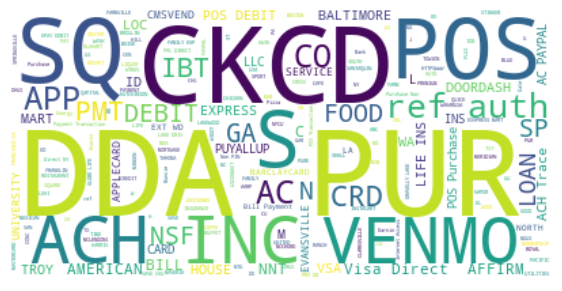

In [53]:
# Word cloud for more frequent merchant names
word_cloud(df_unknown_merchs_pred2.PREDICTIONS)